### Predicting Fifa Players Salary
### STAT 411 FALL 19
### Luke, Lee, Jordana, Sam

1. Our dataset is taken from the FIFA video game from 2018 and tells us every player (17,981 payers) that played in the FIFA 2018 league and over 70 attributes.. This data includes their positioning information as well as their skills based on their performance in the game. The overall feature gives us their overall performance score based on all the individual attributes while potential tells us what their score should be. The dataset also includes wage and value which tells us their yearly salary and their net worth. We had to fix the symbols for the prices since the original dataset was in euros and included “M” for millions and “K” for thousands. The players’ club and age is also represented within this dataset.

2.  * We are asking which attributes have the most significance when it comes to a players salary and relating specific attributes to an individual players salary. 
    * This nonlinear regression problem is important for the national club team managers and coaches to understand if their players are worth the amount that they are spending on each player based on their overall performance and attributes. They may need to know this if they have a salary cap for their team or individual players. 

3. No ethical considerations

In [11]:
import numpy as np                   
import pandas as pa                 
import matplotlib.pyplot as plt      
import seaborn as sn                
import numpy.random as rn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as pltco 
from sklearn.model_selection import cross_val_score

### Import Data Frame assign the name fifa
* Print out the head() or first 5 rows
* Importing data from drop box online

In [12]:
fifa = pa.read_csv('https://www.dropbox.com/s/ov362sryogd0942/CompleteDataset.csv?dl=1', low_memory=False)

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,29,...,55,25,11,61,44,10,83,70,11,GK


### Fixing Bad Data
* Stripped "€" from the front of Wage and "K" from the end
    * We did this so we could convert the wage into a float dtype
* Our attributes values contained a "+" or "-"
    * We removed them in front or behind our int values
    * We removed them if they were in between two int values
        * We stripped the values after the symbol so (79+2 = 79)
    * We did this so we can convert the dtype from string to float 

In [13]:
fifa['Wage'] = fifa['Wage'].map(lambda x: x.lstrip('€').rstrip('K'))

In [14]:
A = fifa["Age"] = fifa.Age.astype(float)
B = fifa["Overall"] = fifa.Overall.astype(float)
C = fifa["Wage"] = fifa.Wage.astype(float)
D = fifa["Potential"] = fifa.Potential.astype(float)

* removeStrings - searches each instance in our data frame and removes it and everything to its right
    1. It looks at each instance in our data frame
        1. searches for "+" then removes it if its finds it and returns the values to its left
        2. searches for "-" then removes it if its finds it and returns the values to its left
        3. returns the instance in the data frame with all the symbols removed

In [15]:
def removeStrings (X):
    if '+' in X:
        K = X.find('+')
        return X[:K]
    if '-' in X:
        K = X.find('-')
        return X[:K]
    else:  
        return X

* convertFloat - accepts the data frame with symbols removed and converts the dtype 
    1. It looks at one specific feature and then each instance in that feature.
    2. Because we already removed the symbol with removeString this converts the dtype to float.

In [16]:
def convertFloat(fifa, feature):
    for K in fifa.index: 
        fifa.loc[K,feature] = removeStrings(fifa.loc[K, feature])

    
    fifa.loc[:, feature] = fifa.loc[:,feature].astype("float")  
    return fifa

### Converting Columns to dtype float so we can use them 
    * Acceleration, Aggression, Agility, Balance, Ball Control, Sprint Speed, Composure, and Dribbling

In [17]:
fifa = convertFloat(fifa, "Acceleration")
fifa = convertFloat(fifa, "Aggression")
fifa = convertFloat(fifa, "Agility")
fifa = convertFloat(fifa, "Balance")
fifa = convertFloat(fifa, "Ball control")

### Avalaible Columns
* Age, Overall, Potentail, Wage, Acceleration, Aggression, Agility, Balance, and Ball Control

### K- nearest neighbors
* We picked Overall + some feature VS Wage
    1. We picked Sprint Speed for over all fitness/attack
    2. We picked Dribbling for ball control abilities/midfield
    3. We picked Sliding Tackle for defense
* Strategy for picking best models 
* This was an effective model for our data set because the model best fits regression problems and our training and testing data R2 are the closest for this model. We predicted that offensive skills would have more significance on the wage and because of this model it confirms our hypothesis.

In [18]:
X = np.array(fifa[['Ball control', 'Overall']])
y = np.array(fifa.iloc[:, 7])

In [19]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [20]:
n = X.shape[0]
test = int(0.30*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]      
y_test = y[:test]
X_train = X[test:]   
y_train = y[test:]

In [21]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):
    
    h = 0.01 
    
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.67198924542739
Testing R2: 0.6286618274760469


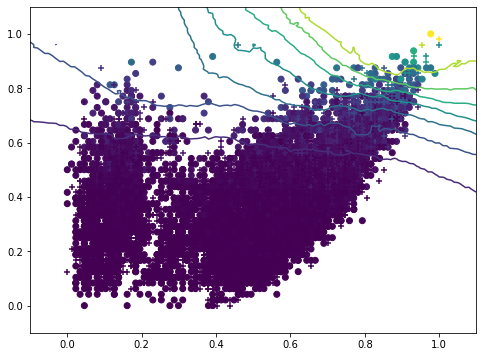

In [22]:
reg = KNeighborsRegressor(n_neighbors=100)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)
plt.show()

#### Cross Validation

In [23]:
knn = cross_val_score(reg, X, y, cv=20)
print('KNN Mean R2: {}'.format(knn.mean()))
print('KNN Standard Deviation R2: {}'.format(knn.std()))

KNN Mean R2: 0.6812725158774656
KNN Standard Deviation R2: 0.043767130843849755


In [24]:
X = np.array(fifa[['Ball control', 'Agility']])
y = np.array(fifa.iloc[:, 3])

In [25]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [26]:
n = X.shape[0]
test = int(0.30*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       
y_test = y[:test]
X_train = X[test:]     
y_train = y[test:]

Training R2: 0.5414681840442274
Testing R2: 0.5152094402469345


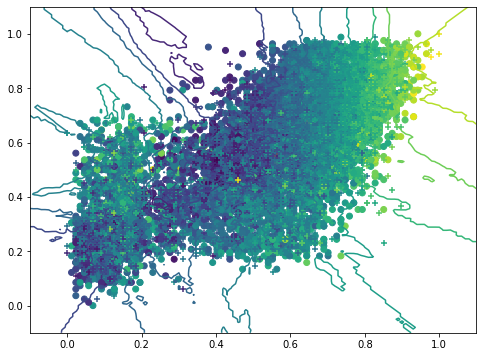

In [27]:
reg1 = KNeighborsRegressor(n_neighbors=25)
reg1.fit(X_train, y_train)
plot_reg_model(reg1, X_train, y_train, X_test, y_test)
plt.show()

#### Cross Validation

In [28]:
knn = cross_val_score(reg1, X, y, cv=20)
print('KNN Mean R2: {}'.format(knn.mean()))
print('KNN Standard Deviation R2: {}'.format(knn.std()))

KNN Mean R2: 0.5074346122656105
KNN Standard Deviation R2: 0.02246873271958798


### PCA Model 
* We expect this model to be a poor fit for us because it is a classification model and we are asking a regression problem
* In this model we get a super small training and testing data which doesnt help us predict the wage at all
* We might have some outliers that are skewing our data

In [29]:
X = np.array(fifa.iloc[:,7:10])
y = np.array(fifa.iloc[:, 1])

pca = PCA(n_components=2)
Xpca = pca.fit_transform(X);

import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)          
perm = rn.permutation(n)   
X = Xpca[perm]
y = y[perm]
X_test = Xpca[:test]     
y_test = y[:test]
X_train = Xpca[test:]   
y_train = y[test:]


In [30]:
cat1 = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.08512531514162835, 0.07741935483870968)

In [31]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 0.01 
    
    x_min, x_max = -40.0, 40.0
    y_min, y_max = -20.0, 20.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.00045825649243902417
Testing R2: -0.013291318825394692


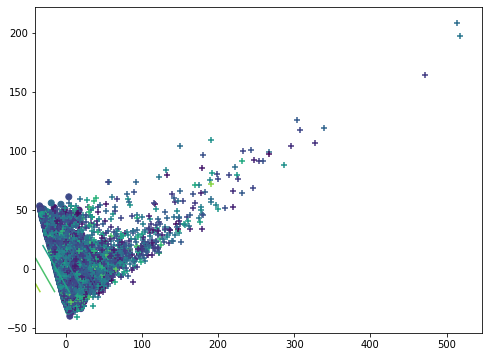

In [32]:
reg = LinearRegression()
reg.fit(X_train,y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)
plt.show()

#### Cross Validation

In [33]:
pca = cross_val_score(reg, X, y, cv=10)
print('PCA Mean R2: {}'.format(pca.mean()))
print('PCA Standard Deviation R2: {}'.format(pca.std()))

PCA Mean R2: 0.03799527066135801
PCA Standard Deviation R2: 0.007331867412955032


* PCA Model With Columns 10,11,12 vs Age

In [34]:
X = np.array(fifa.iloc[:,10:13])                        
y = np.array(fifa.iloc[:, 1])

pca = PCA(n_components=2) 
Xpca = pca.fit_transform(X);

import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)            
perm = rn.permutation(n)   
X = Xpca[perm]
y = y[perm]
X_test = Xpca[:test]      
y_test = y[:test]
X_train = Xpca[test:]    
y_train = y[test:]


In [35]:
cat2 = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train[:, 0:2], y_train)
cat2.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.08438380542785111, 0.08031145717463849)

Training R2: 0.0008925036763191008
Testing R2: -0.0010780658097957474


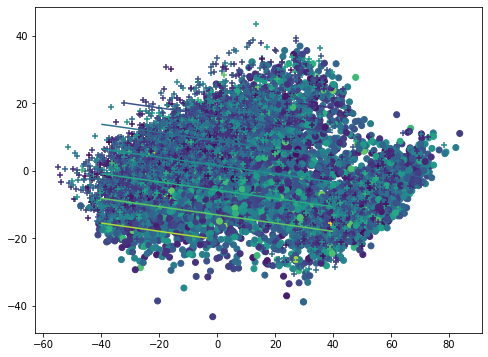

In [36]:
reg2 = LinearRegression()
reg2.fit(X_train,y_train)
plot_reg_model(reg2, X_train, y_train, X_test, y_test)
plt.show()

#### Cross Validation

In [37]:
pca = cross_val_score(reg2, X, y, cv=10)
print('PCA Mean R2: {}'.format(pca.mean()))
print('PCA Standard Deviation R2: {}'.format(pca.std()))

PCA Mean R2: 0.03376910493074916
PCA Standard Deviation R2: 0.010788894326106937


### Ridge and Lasso 
* We picked Overall + some features VS Wage
    1. We picked Agility 
    2. We picked Ball Control
* The strategy in picking this model was to run some of our features through it to see if there is a pattern in certain features. This would help give us a baseline of features to run in the next models.
* This was effective in helping us understand the correlation between our features and the wage. Though the numbers might not look to good, it did start to give us a good idea on certain features. 

In [38]:
X = np.array(fifa[['Age', 'Overall']])
y = np.array(fifa['Wage'])

In [39]:
def plot_reg_model(reg, X, y):


    n = X.shape[0]
    test = int(0.20*n)           
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]      
    y_test = y[:test]
    X_train = X[test:]     
    y_train = y[test:]
    
    reg.fit(X_train, y_train) 
     
    nn = 200
    
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   
        np.linspace(y_min, y_max, nn))                    
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) 

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

Training R2: 0.3693546123237702
Testing R2: 0.382866035529485


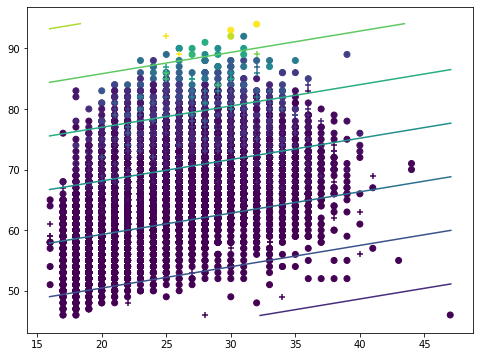

In [40]:
reg = LinearRegression()
plot_reg_model(reg, X, y)
plt.show()

Training R2: 0.3753195891865008
Testing R2: 0.35661422344661675


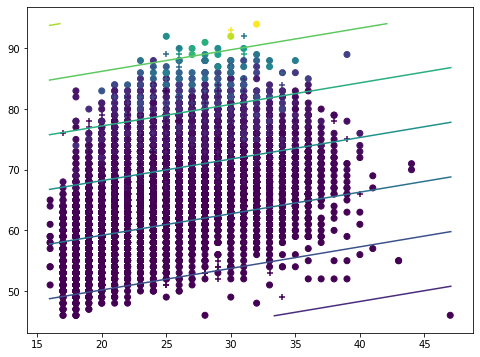

In [41]:
ridge_reg = Ridge(alpha=2)
plot_reg_model(ridge_reg, X, y)
plt.show()

Training R2: 0.36496463924778433
Testing R2: 0.39849268104100266


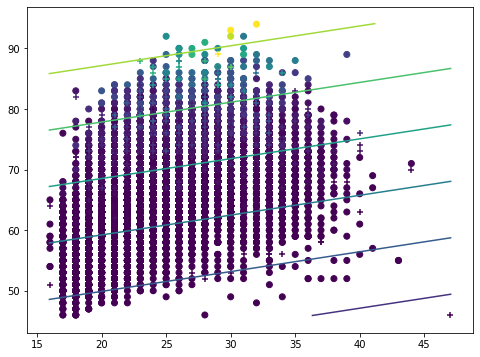

In [42]:
lasso_reg=Lasso(alpha=1)
plot_reg_model(lasso_reg, X, y)
plt.show()

Training R2: 0.76476332921086
Testing R2: 0.7019093006523047


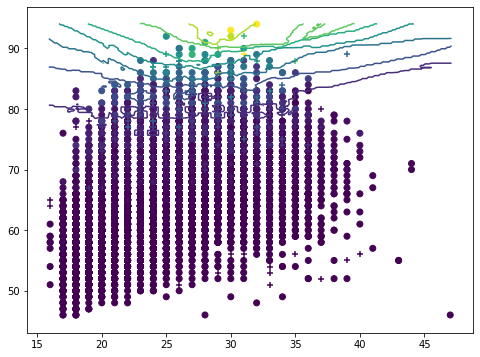

In [43]:
knn = KNeighborsRegressor(n_neighbors=10)
plot_reg_model(knn, X, y)
plt.show()

Training R2: 0.7765638181152136
Testing R2: 0.7392255715325299


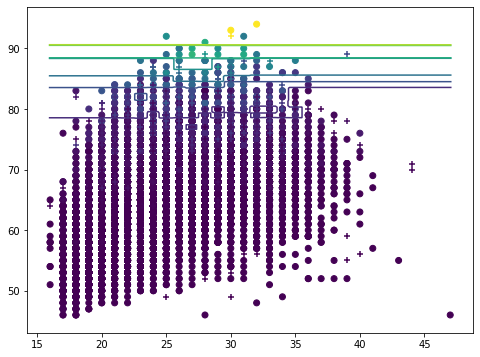

In [44]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
plot_reg_model(tree, X, y)
plt.show()

#### Cross Validation

In [45]:
lreg = cross_val_score(reg, X, y, cv=10)
ridge = cross_val_score(ridge_reg, X, y, cv=10)
LASSO = cross_val_score(lasso_reg, X, y, cv=10)
TREE = cross_val_score(tree, X, y, cv=10)

In [46]:
print('Linear Regression Mean R2: {}'.format(lreg.mean()))
print('Linear Regression Standard Deviation R2: {}'.format(lreg.std()))

Linear Regression Mean R2: -83.31855263403419
Linear Regression Standard Deviation R2: 237.01937423740821


In [47]:
print('Ridge Mean R2: {}'.format(ridge.mean()))
print('Ridge Standard Deviation R2: {}'.format(ridge.std()))

Ridge Mean R2: -83.31767530533001
Ridge Standard Deviation R2: 237.01691550468036


In [48]:
print('Lasso Mean R2: {}'.format(LASSO.mean()))
print('Lasso Standard Deviation R2: {}'.format(LASSO.std()))

Lasso Mean R2: -81.03511768363349
Lasso Standard Deviation R2: 230.99397781248348


In [49]:
print('Tree Mean R2: {}'.format(TREE.mean()))
print('Tree Standard Deviation R2: {}'.format(TREE.std()))

Tree Mean R2: -0.09281349373616797
Tree Standard Deviation R2: 0.093042535633659


### Nueral Network Models
* We used our other models that we have already shown to find what attributes have the largest significance on wage
    1. We chose our "offensive" skills becasuse we found those are better predictors of wage than defensive/goalkeeping abilities
* Strategy for evaluating the models
    1. We notice we get better result for ball control in nueral networks which contradict what we have for ridge and lasso above
* The models with offensive skills tend to work better to predict our hypothesis and we know this because our models with those skills test and train better

In [50]:
X = np.array(fifa[['Agility', 'Overall']])
y = np.array(fifa['Wage'])

In [51]:
def plot_reg_model(reg, X, y):


    n = X.shape[0]
    test = int(0.20*n)          
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]     
    y_test = y[:test]
    X_train = X[test:]   
    y_train = y[test:]
    
    reg.fit(X_train, y_train) 
     
    nn = 200
   
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   
        np.linspace(y_min, y_max, nn))                    
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) 
   
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

### Nueral Network Ridge Regression

Training R2: 0.3498660087743848
Testing R2: 0.3658462172681181


<function matplotlib.pyplot.show(*args, **kw)>

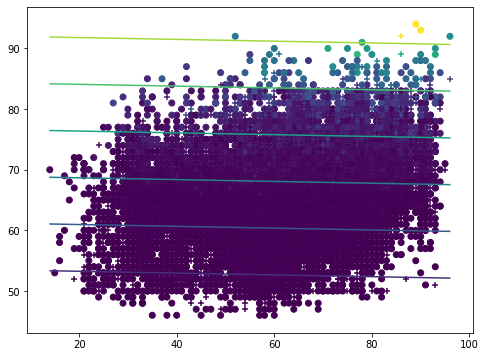

In [52]:
r_reg = Ridge(alpha=2)
plot_reg_model(r_reg, X, y)
plt.show

In [53]:
ridge = cross_val_score(r_reg, X, y, cv=10)
print('Ridge Mean R2: {}'.format(ridge.mean()))
print('Ridge Standard Deviation R2: {}'.format(ridge.std()))

Ridge Mean R2: -89.69855976614753
Ridge Standard Deviation R2: 257.05798743335174


### Nueral Network Lasso Regression

Training R2: 0.34998018867314384
Testing R2: 0.3662891350617341


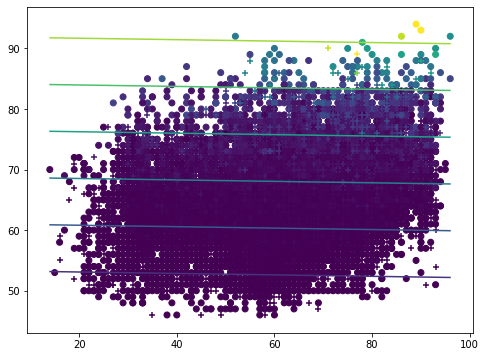

In [54]:
l_reg=Lasso(alpha=1)
plot_reg_model(l_reg, X, y)
plt.show()

In [55]:
lasso = cross_val_score(l_reg, X, y, cv=10)
print('Lasso Mean R2: {}'.format(lasso.mean()))
print('Lasso Standard Deviation R2: {}'.format(lasso.std()))

Lasso Mean R2: -86.86846732479378
Lasso Standard Deviation R2: 248.97339510556557


### Nueral Network K-nearest Neighbors Regression

Training R2: 0.7938257183418762
Testing R2: 0.6788576202903471


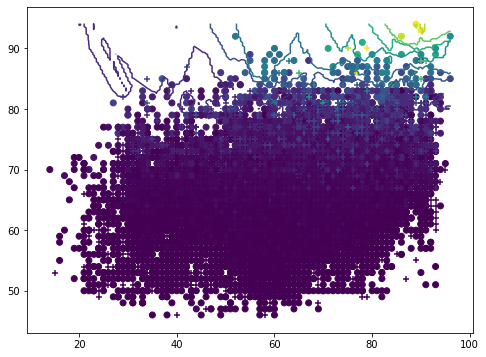

In [56]:
knn = KNeighborsRegressor(n_neighbors=6)
plot_reg_model(knn, X, y)
plt.show()

In [57]:
knn = cross_val_score(knn, X, y, cv=10)
print('KNN Mean R2: {}'.format(knn.mean()))
print('KNN Standard Deviation R2: {}'.format(knn.std()))

KNN Mean R2: -0.2503245935877572
KNN Standard Deviation R2: 0.11359501797490984


### Decision Tree Model
* Using the descision tree model we used overall and age 


Training R2: 0.8275215841303827
Testing R2: 0.709450190908389


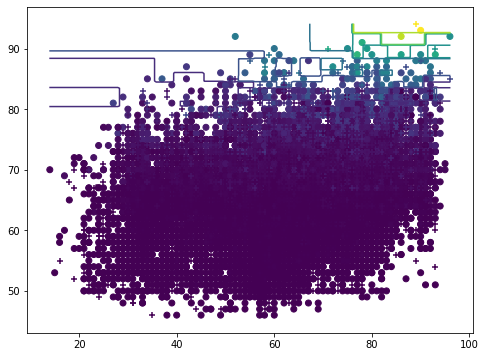

In [58]:
tree = DecisionTreeRegressor(max_depth=10)
plot_reg_model(tree, X, y)
plt.show()

In [59]:
tree = cross_val_score(tree, X, y, cv=10)
print('Tree Mean R2: {}'.format(tree.mean()))
print('Tree Standard Deviation R2: {}'.format(tree.std()))

Tree Mean R2: -0.3426792261115543
Tree Standard Deviation R2: 0.5351939872583742


## Ensemble Models
* We used the "defensive" feature to evaluate the forest and boosting methods
* Strategy for evaluating the models
    1. Both models gave a pretty good prediction based on given features

Training R2: 0.7461393576699458
Testing R2: 0.7428916337678695


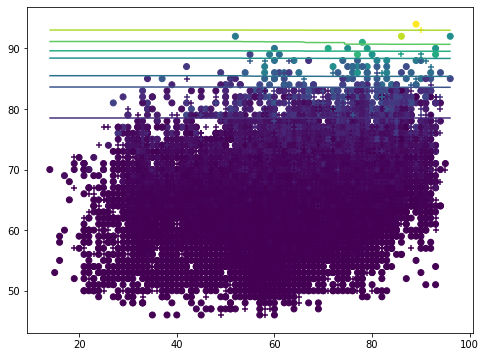

In [60]:
forest = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1)
plot_reg_model(forest, X, y)
plt.show()

In [61]:
Ensemble = cross_val_score(forest, X, y, cv=10)
print('Ensemble Mean R2: {}'.format(Ensemble.mean()))
print('Ensemble Standard Deviation R2: {}'.format(Ensemble.std()))

Ensemble Mean R2: -0.5560007628120395
Ensemble Standard Deviation R2: 0.9110074861007502


### Gradient Boosting Esamble Network Model

Training R2: 0.8183212317247694
Testing R2: 0.7243584552868347


<function matplotlib.pyplot.show(*args, **kw)>

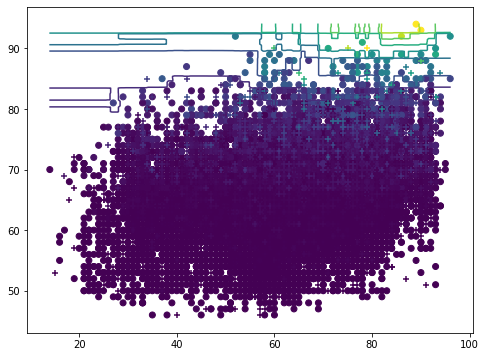

In [62]:
boost = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5)
plot_reg_model(boost, X, y)
plt.show

In [63]:
Boost = cross_val_score(boost, X, y, cv=10)
print('Boost Mean R2: {}'.format(Boost.mean()))
print('Boost Standard Deviation R2: {}'.format(Boost.std()))

Boost Mean R2: -0.10927113584264192
Boost Standard Deviation R2: 0.13139277570036206


### Nueral Networks for Regression

In [64]:
X = np.array(fifa[['Age','Overall']])
y = np.array(fifa['Wage'])

In [65]:
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()  

Training R2: 0.7538931388997485
Testing R2: 0.7626947438590806


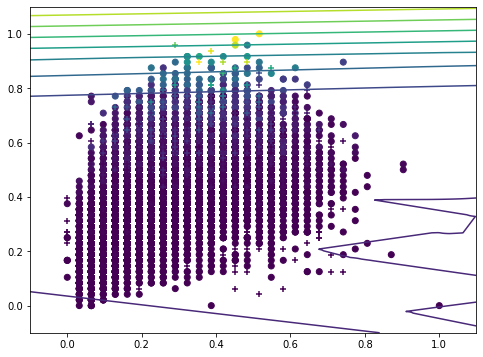

In [66]:
mlp = MLPRegressor(hidden_layer_sizes = (100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp, Xn, y)
plt.show()

In [67]:
mlp_score = cross_val_score(mlp, Xn, y, cv=10)
print('MLP Mean R2: {}'.format(mlp_score.mean()))
print('MLP Standard Deviation R2: {}'.format(mlp_score.std()))

MLP Mean R2: -0.7144164462912606
MLP Standard Deviation R2: 2.011181259703511


* adding an addtional layer to improve performance

Training R2: 0.751798179697996
Testing R2: 0.763619511896695


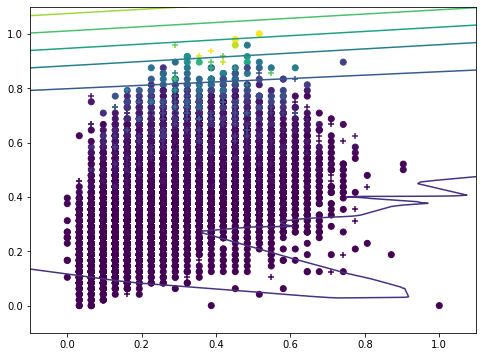

In [68]:
mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp2, Xn, y)
plt.show()

In [69]:
mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
mlp = cross_val_score(mlp2, Xn, y, cv=4)
print('MLP Mean R2: {}'.format(mlp.mean()))
print('MLP Standard Deviation R2: {}'.format(mlp.std()))

MLP Mean R2: -0.6767817259446457
MLP Standard Deviation R2: 0.9941780117674629


# Cross validation

In [70]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25,
    random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))
#[9 1 6 7 3 0 5] [2 8 4]

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


In [71]:
ss = ShuffleSplit(n_splits=5, test_size=0.1).split(Xn)
score_train = []
score_test = []
for train_index, test_index in ss:
    mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
    mlp2.fit(Xn[train_index,:],y[train_index])
    score_train+=[mlp2.score(Xn[train_index,:],y[train_index])]
    score_test+=[mlp2.score(Xn[test_index,:],y[test_index])]
score_test

[0.6876670147373081,
 0.7877229483845362,
 0.6452689621483778,
 0.7297277451150073,
 0.7448113060587926]

In [72]:
score_train

[0.7614404724398592,
 0.7486606721327205,
 0.7646363357982795,
 0.7583340322000591,
 0.7558273266774761]

## Shuffle Split

In [73]:
def shuffle_split(mlp2):
    ss = ShuffleSplit(n_splits=5, test_size=0.1).split(Xn)
    score_train = []
    score_test = []
    for train_index, test_index in ss:
        mlp2.fit(Xn[train_index,:],y[train_index])
        score_train+=[mlp2.score(Xn[train_index,:],y[train_index])]
        score_test+=[mlp2.score(Xn[test_index,:],y[test_index])]
    return score_test

In [74]:
mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
shuffle_split(mlp2)

[0.6808372782529957,
 0.7555034687761771,
 0.7567551986823837,
 0.7126563542012329,
 0.7524165802341279]

In [75]:
mlp = MLPRegressor(hidden_layer_sizes = (100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
shuffle_split(mlp)

[0.7321828480847327,
 0.7058025814490656,
 0.7921481106962736,
 0.7607255956109786,
 0.7583437839194846]

In [76]:
boost = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5)
shuffle_split(boost)

[0.741902173346717,
 0.7531449074018755,
 0.5524008984452964,
 0.7924258505932904,
 0.7960630586142518]

In [77]:
forest = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1)
shuffle_split(forest)

[0.7244598631651173,
 0.6968247843929823,
 0.789081364860127,
 0.8105846176284428,
 0.711765302603745]

In [78]:
tree = DecisionTreeRegressor(max_depth=10)
shuffle_split(tree)

[0.6509407296699862,
 0.7189071584931882,
 0.7125841028724077,
 0.6875919156003134,
 0.7598062612556907]

In [79]:
knn = KNeighborsRegressor(n_neighbors=6)
shuffle_split(knn)

[0.7152054263604963,
 0.6396860280385912,
 0.7358127297309294,
 0.7756580072092043,
 0.6477109215204435]

In [80]:
lasso_reg=Lasso(alpha=1)
shuffle_split(lasso_reg)

[0.30052254958228164,
 0.2737449286956356,
 0.3041056156898103,
 0.2277867238386911,
 0.27004033139233397]

In [81]:
ridge_reg = Ridge(alpha=2)
shuffle_split(ridge_reg)

[0.40330828664907925,
 0.40515852739722624,
 0.3765994922980359,
 0.29851881718081197,
 0.38246533959025364]

In [82]:
reg = LinearRegression()
shuffle_split(reg)

[0.3487250545323617,
 0.3917607415060696,
 0.40463499799374025,
 0.40032508777444087,
 0.3511713972818233]

### Conclusion
* PCA and linear regression did not really give us the best results
* K-nearest neighbors and neural networking had the best results
    * supported by cross validation and shuffle split values
* Since all the features were not relevant to eachother based on position it was best to select attributes that related to offense, defense, and overall


### OVERALL
* #### Offensive players tend to get paid more when considering their offensive skills, while their defensive and goalie skills do not give good predictors for wage. 
* #### Those who are good offensive players, such as forwards and others who score goals, are paid more than the defensive players in the FIFA league. 
